# IMPORTING MODULES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sb
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

# Loading DataSets

In [2]:
# importing datasets
Train =pd.read_csv('train.csv',index_col='id')
Test =pd.read_csv('test.csv',index_col='id')

In [3]:
#checking the first five rows of the datasets
Train.head(5)

,date,country,store,product,num_sold
id,,,,,
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [4]:
Test.head(5)

,date,country,store,product
id,,,,
230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
230131,2017-01-01,Canada,Discount Stickers,Kaggle
230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
230133,2017-01-01,Canada,Discount Stickers,Kerneler
230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


# Exploratory Data Analysis (EDA)

In [5]:
# finding information about the dataset

In [6]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230130 entries, 0 to 230129
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      230130 non-null  object 
 1   country   230130 non-null  object 
 2   store     230130 non-null  object 
 3   product   230130 non-null  object 
 4   num_sold  221259 non-null  float64
dtypes: float64(1), object(4)
memory usage: 10.5+ MB


In [7]:
Train['date'].unique()

array(['2010-01-01', '2010-01-02', '2010-01-03', ..., '2016-12-29',
       '2016-12-30', '2016-12-31'], dtype=object)

In [8]:
# checking the number of rows and columns
Train.shape

(230130, 5)

In [9]:
Train['date']= pd.to_datetime(Train['date'],dayfirst=True)

In [10]:
Train['date'].unique()

array(['2010-01-01T00:00:00.000000000', '2010-01-02T00:00:00.000000000',
       '2010-01-03T00:00:00.000000000', ...,
       '2016-12-29T00:00:00.000000000', '2016-12-30T00:00:00.000000000',
       '2016-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [11]:
# checking for duplicated values
Train.duplicated().sum()

0

In [12]:
# checking for missing values
Train.isnull().sum()/Train.shape[0]*100

date        0.000000
country     0.000000
store       0.000000
product     0.000000
num_sold    3.854778
dtype: float64

In [13]:
# dropping missing vales
Train=Train.dropna(axis=0)

In [14]:
Train.isnull().sum()

date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [15]:
Train.head(6)

,date,country,store,product,num_sold
id,,,,,
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0
6,2010-01-01,Canada,Stickers for Less,Kaggle,1837.0


In [16]:
# total number of stickers sold by country
N_sold_by_country=Train.groupby(['country'])['num_sold'].sum()

In [17]:
N_sold_by_country=pd.DataFrame(N_sold_by_country).reset_index()

In [18]:
N_sold_by_country.head()

,country,num_sold
0,Canada,28653095.0
1,Finland,28698872.0
2,Italy,20797669.0
3,Kenya,689141.0
4,Norway,54562305.0


Text(0.5, 0, 'Country')

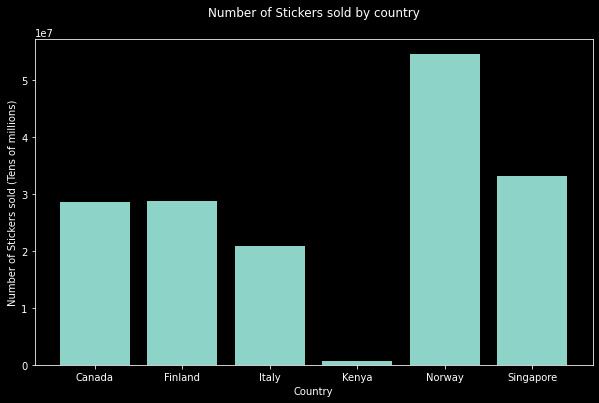

In [19]:
#visualizing using a bar graph
plt.figure(figsize=(10,6))
plt.bar(N_sold_by_country['country'],N_sold_by_country['num_sold'])
plt.title('Number of Stickers sold by country',y=1.05)
plt.ylabel('Number of Stickers sold (Tens of millions)')
plt.xlabel('Country')

In [20]:
Train['month']=Train['date'].dt.month

In [21]:
Train['year']= Train['date'].dt.year

In [22]:
Train.head()

,date,country,store,product,num_sold,month,year
id,,,,,,,
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,1,2010
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,1,2010
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,1,2010
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1,2010
5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,1,2010


In [23]:
import calendar

In [24]:
Train['month_name']=Train['month'].apply(lambda x: calendar.month_name[x])

In [25]:
Train.head()

,date,country,store,product,num_sold,month,year,month_name
id,,,,,,,,
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,1,2010,January
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,1,2010,January
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,1,2010,January
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1,2010,January
5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,1,2010,January


In [26]:
Train=Train.drop('month',axis=1)

In [27]:
# checking the number of goods sold by store and month
N_sold_by_mth_and_store=Train.groupby(['month_name','store'])['num_sold'].sum()

In [28]:
N_sold_by_mth_and_store=pd.DataFrame(N_sold_by_mth_and_store).reset_index()
N_sold_by_mth_and_store

,month_name,store,num_sold
0,April,Discount Stickers,2569005.0
1,April,Premium Sticker Mart,6175201.0
2,April,Stickers for Less,5216916.0
3,August,Discount Stickers,2540244.0
4,August,Premium Sticker Mart,6118822.0
5,August,Stickers for Less,5155086.0
6,December,Discount Stickers,2706186.0
7,December,Premium Sticker Mart,6531279.0
8,December,Stickers for Less,5515317.0
9,February,Discount Stickers,2367554.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

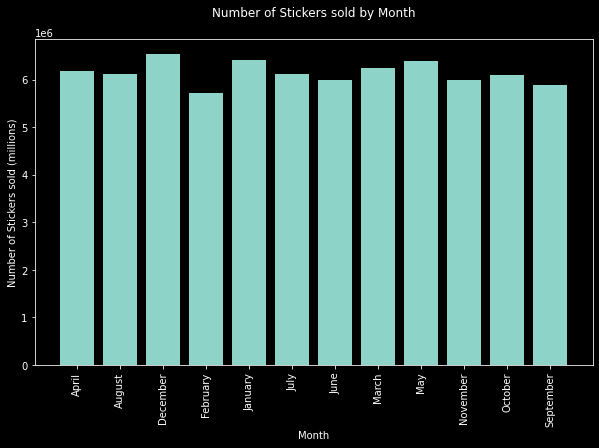

In [29]:
plt.figure(figsize=(10,6))
plt.bar(N_sold_by_mth_and_store['month_name'],N_sold_by_mth_and_store['num_sold'])
plt.title('Number of Stickers sold by Month',y=1.05)
plt.ylabel('Number of Stickers sold (millions)')
plt.xlabel('Month')
plt.xticks(rotation=90)

In [30]:
N_sold_by_year=Train.groupby(['year'])['num_sold'].sum()

In [31]:
N_sold_by_year=pd.DataFrame(N_sold_by_year).reset_index()


In [32]:
N_sold_by_year

,year,num_sold
0,2010,22134393.0
1,2011,26171899.0
2,2012,24709710.0
3,2013,25509417.0
4,2014,24570658.0
5,2015,21883106.0
6,2016,21524273.0


(array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

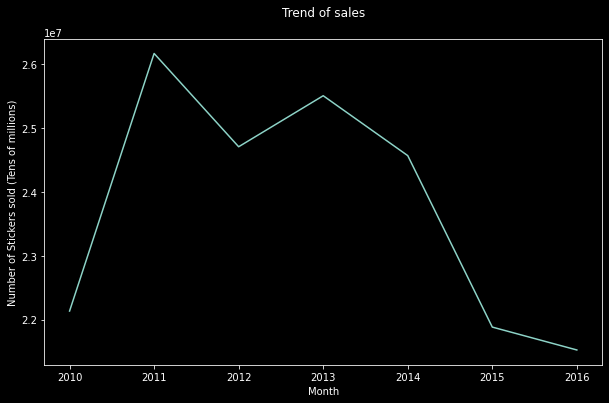

In [33]:
plt.figure(figsize=(10,6))
plt.plot(N_sold_by_year['year'],N_sold_by_year['num_sold'])
plt.title('Trend of sales',y=1.05)
plt.ylabel('Number of Stickers sold (Tens of millions)')
plt.xlabel('Month')
plt.xticks(rotation=0)

# STATISTICS

In [34]:
# descriptive statistics for the number of stickers sold
Train['num_sold'].describe()

count    221259.000000
mean        752.527382
std         690.165445
min           5.000000
25%         219.000000
50%         605.000000
75%        1114.000000
max        5939.000000
Name: num_sold, dtype: float64

# MACHINE LEARNING MODEL

In [35]:
# changing categorical data into numerical
Le = LabelEncoder()

In [36]:
for item in Train:
    if Train[item].dtype=='object':
        Train[item]=Le.fit_transform(Train[item])

In [37]:
Train.head()

,date,country,store,product,num_sold,year,month_name
id,,,,,,,
1,2010-01-01,0,0,1,973.0,2010,4
2,2010-01-01,0,0,2,906.0,2010,4
3,2010-01-01,0,0,3,423.0,2010,4
4,2010-01-01,0,0,4,491.0,2010,4
5,2010-01-01,0,2,0,300.0,2010,4


In [38]:
# converting the date time to a numerical representation (timestamp)
Train['timestamp']=Train['date'].apply(lambda x: x.timestamp())

In [39]:
#creating a sine encoding for the time stamp
Train['sine_Time']=np.sin(2*np.pi*Train['timestamp']/(365*24*60*60))

(array([14245., 14610., 14975., 15340., 15706., 16071., 16436., 16801.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

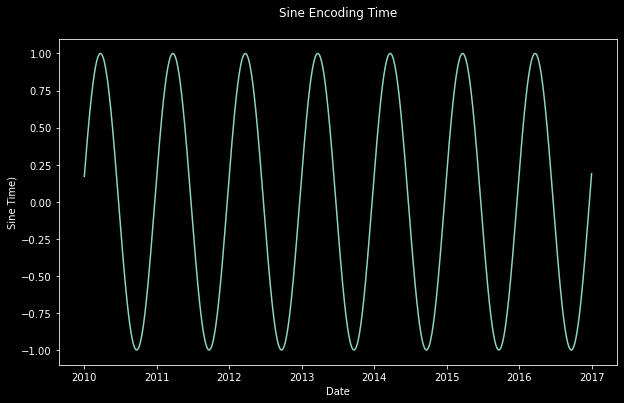

In [40]:
# plot the sine encoding
plt.figure(figsize=(10,6))
plt.plot(Train['date'],Train['sine_Time'])
plt.title('Sine Encoding Time',y=1.05)
plt.ylabel('Sine Time)')
plt.xlabel('Date')
plt.xticks(rotation=0)

In [41]:
Train.head()

,date,country,store,product,num_sold,year,month_name,timestamp,sine_Time
id,,,,,,,,,
1,2010-01-01,0,0,1,973.0,2010,4,1.262304e+09,0.171293
2,2010-01-01,0,0,2,906.0,2010,4,1.262304e+09,0.171293
3,2010-01-01,0,0,3,423.0,2010,4,1.262304e+09,0.171293
4,2010-01-01,0,0,4,491.0,2010,4,1.262304e+09,0.171293
5,2010-01-01,0,2,0,300.0,2010,4,1.262304e+09,0.171293


In [42]:
Train=Train.drop(['date','year','month_name'],axis=1)

In [43]:
Train.head()

,country,store,product,num_sold,timestamp,sine_Time
id,,,,,,
1,0,0,1,973.0,1.262304e+09,0.171293
2,0,0,2,906.0,1.262304e+09,0.171293
3,0,0,3,423.0,1.262304e+09,0.171293
4,0,0,4,491.0,1.262304e+09,0.171293
5,0,2,0,300.0,1.262304e+09,0.171293


In [44]:
X=Train.drop('num_sold',axis=1)
Y = Train['num_sold']

In [45]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=42 )


In [46]:
#from sklearn.ensemble import RandomForestRegressor
# initializing the machine learning algorithm RandomForestClassifier
#model = RandomForestRegressor(n_estimators=100,max_depth=2)

In [47]:
#model.fit(X_train,Y_train)

In [48]:
#Y_pred=model.predict(X_test)

In [49]:
#from sklearn import metrics
#from sklearn.metrics import mean_absolute_percentage_error

In [50]:
#print(f'Accuracy is : {metrics.mean_absolute_percentage_error(Y_test,Y_pred)}')

In [51]:
import statsmodels as st

In [52]:
from statsmodels.tsa.arima.model import ARIMA

In [53]:
y_arima= Y_train.values

In [54]:
Armodel=ARIMA(y_arima,order=(5,1,0))

In [55]:
model_fit=Armodel.fit()

In [56]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:               177007
Model:                 ARIMA(5, 1, 0)   Log Likelihood            -1421927.434
Date:                Tue, 21 Jan 2025   AIC                        2843866.869
Time:                        12:28:19   BIC                        2843927.372
Sample:                             0   HQIC                       2843884.771
                             - 177007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8314      0.002   -367.083      0.000      -0.836      -0.827
ar.L2         -0.6633      0.003   -232.235      0.000      -0.669      -0.658
ar.L3         -0.4981      0.003   -163.657      0.0

In [57]:
# making predictions on the testing portion
ytest_arima= Y_test.values

In [58]:
predictions = model_fit.predict(start=len(y_arima),end=len(y_arima)+len(ytest_arima)-1)

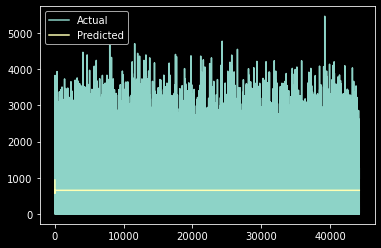

In [59]:
# plot Actual and predicted values
plt.plot(ytest_arima, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [60]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

In [61]:
print(f'MAPE is : {metrics.mean_absolute_percentage_error(ytest_arima,predictions)}')

MAPE is : 7.87559929524757


In [62]:
Test_predictions= model_fit.predict(start=len(Y),end=len(Y)+len(Test)-1)

In [63]:
submission_df=pd.read_csv('sample_submission.csv')

In [64]:
submission_df['num_sold']=Test_predictions
submission_df.to_csv('submission.csv',index=False)

In [65]:
pd.read_csv('submission.csv')

,id,num_sold
0,230130,655.689386
1,230131,655.689386
2,230132,655.689386
3,230133,655.689386
4,230134,655.689386
...,...,...
98545,328675,655.689386
98546,328676,655.689386
98547,328677,655.689386
98548,328678,655.689386
